<a href="https://colab.research.google.com/github/yuaquintero/DeepLearning/blob/master/U2_13_%5BTALLER%5D_Vanishing_gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

replicating local resources


In [0]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
import tensorflow as tf
tf.__version__

setting tensorflow version in colab
TensorFlow 2.x selected.


'2.1.0'

In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from IPython.display import Image

%matplotlib inline

In [0]:
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, concatenate, Input
from tensorflow.keras.backend import clear_session
from tensorflow import keras

## Lab vanishing gradient


In this lab you will impement a complete exploration and results visualization for the following experiment configurations  with dense neural networks:

- with the following numbers of layers [2,3,4,5,6,7,8,9,10]
- with the following neurons per layer [3,5,10,30]
- with activations ReLU, Sigmoid and LeakyReLU

In total, you must train and test 36 network architectures for each activation function.

The experimentation must be done with the MNIST Digits datasets (1500 items) using a random partition of 50/50 for train and test.

For each configuration you must record the **accuracy in test** and the **time used to train** the model.

Then, you will need to build the following visualizations

- one heat map for each activation function illustrating the **accuracy in test** for each configuration
- one heat map for each activation function illustrating the **time used to train** for each configuration
- a scatter plot of all your experiments, showing:
    - the time used to train in the x-axis
    - the accuracy in test in the y-axis
    - the number of layers as the size of the dots
    - expetiments for each activation function in different colors   
- a bar plot showing the average performance of each activation function for each number of layers.




Your visualizations must look similar to these ones:


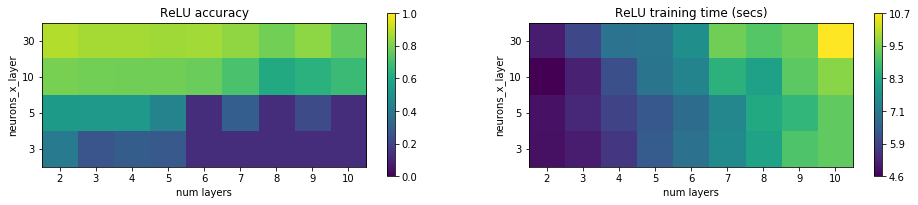

In [0]:
Image(filename='local/imgs/lab_vanishing_01.png')

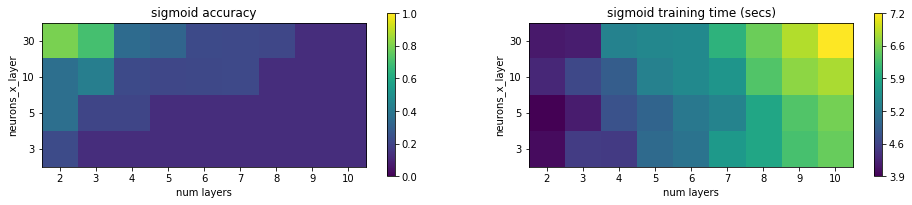

In [0]:
Image(filename='local/imgs/lab_vanishing_02.png')

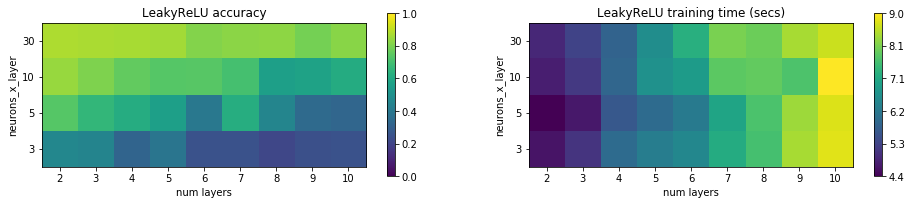

In [0]:
Image(filename='local/imgs/lab_vanishing_03.png')

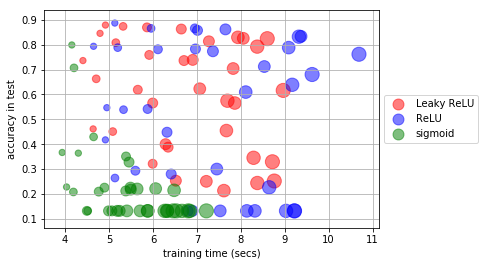

In [0]:
Image(filename='local/imgs/lab_vanishing_04.png')

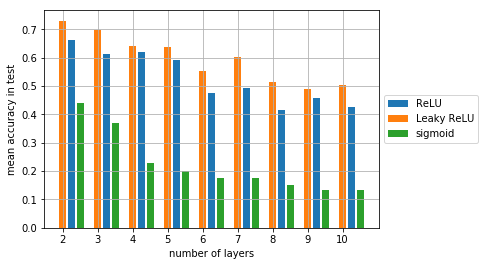

In [0]:
Image(filename='local/imgs/lab_vanishing_05.png')

In [0]:
mnist = pd.read_csv("local/data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=mnist[:,1:785]/255.
y=mnist[:,0]
print("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state =40)
y_train_oh = np.eye(10)[y_train]
y_test_oh  = np.eye(10)[y_test]
print(X_train.shape, y_train_oh.shape,  X_test.shape, y_test_oh.shape)

(750, 784) (750, 10) (750, 784) (750, 10)


In [0]:
def get_model(input_dim=784, output_dim=10, num_hidden_layers=6, hidden_size=10, activation="relu"):

    clear_session()
    model = Sequential()
    model.add(Dense(hidden_size, activation=activation, input_dim=input_dim, name="Layer_%02d_Input"%(0)))
    
    for i in range(num_hidden_layers):
        model.add(Dense(hidden_size, activation=activation, name="Layer_%02d_Hidden"%(i+1)))
   
    model.add(Dense(output_dim, activation="softmax", name="Layer_%02d_Output"%(num_hidden_layers+1)))
        
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.reset_states()
    return model

In [0]:
 model = get_model(num_hidden_layers=2, hidden_size=5,activation="relu")
 model.fit(X_train, y_train_oh, epochs=100, verbose=0, batch_size=32, validation_data=(X_test, y_test_oh))
 preds_test = model.predict(X_test).argmax(axis=1)
 accur=np.mean(preds_test==y_test)
 print("Accuracy: %f"%(accur))

Accuracy: 0.689333


In [0]:
model.history.params

{'batch_size': 32,
 'do_validation': True,
 'epochs': 100,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy'],
 'samples': 750,
 'steps': 24,
 'verbose': 0}

In [0]:
num_Layer    = [2,3,4,5,6,7,8,9,10]
neuronsXLayer= [3,5,10,30]
activation  = ["relu", "sigmoid",tf.nn.leaky_relu]

In [0]:
Acc_test = pd.DataFrame(np.zeros((len(num_Layer)*len(activation), len(neuronsXLayer)))*np.nan, 
                      index=[[str(a)+"-"+str(b) for a,b in itertools.product (activation, num_Layer)]],
                      columns=[str(i) for i in neuronsXLayer])

In [0]:
Time_train = pd.DataFrame(np.zeros((len(num_Layer)*len(activation), len(neuronsXLayer)))*np.nan, 
                      index=[[str(a)+"-"+str(b) for a,b in itertools.product (activation, num_Layer)]],
                      columns=[str(i) for i in neuronsXLayer])

In [0]:
Acc_test.shape

(27, 4)

In [0]:
import tensorflow as tf
import time

c=0
f=0
for  activ,num_l, num_n, in itertools.product(activation,num_Layer,neuronsXLayer):
 t1=time.time()
 model = get_model(num_hidden_layers=num_l, hidden_size=num_n,activation=activ)
 model.fit(X_train, y_train_oh, epochs=50, verbose=0, batch_size=32, validation_data=(X_test, y_test_oh))
 t2=time.time()
 preds_test = model.predict(X_test).argmax(axis=1)
 Time_train.iloc[f][c]=t2.real-t1.real
 Acc_test.iloc[f][c]=np.mean(preds_test==y_test)
 c=c+1 
 if(c>=4):
      c=0
      f=f+1     

      

## Heatmaps


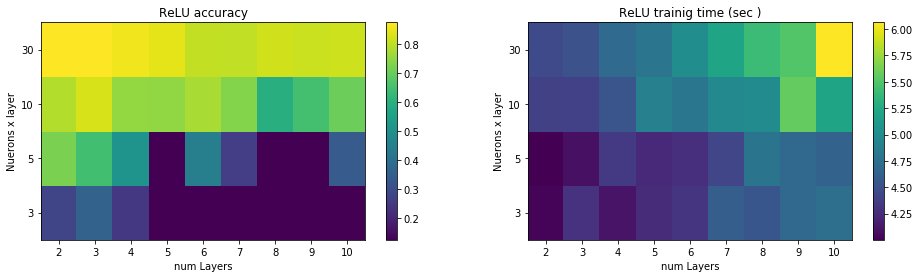

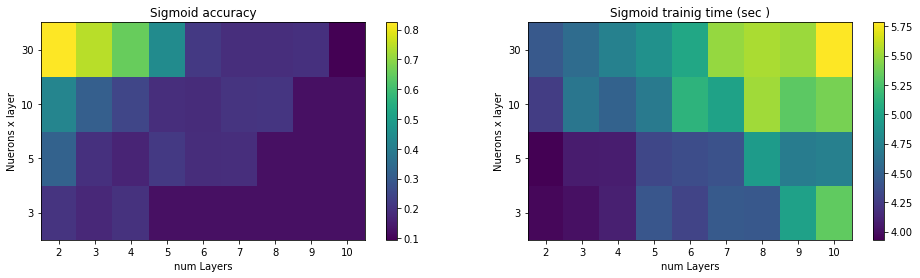

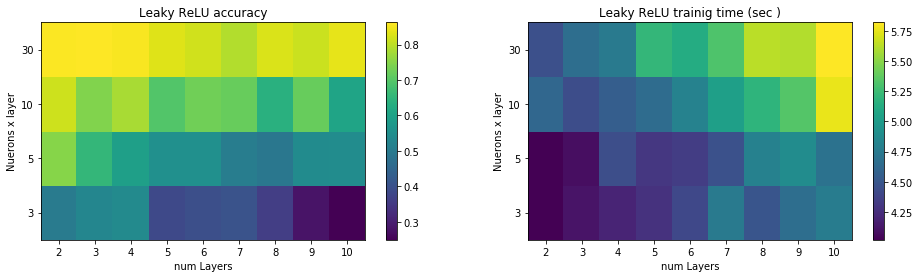

In [0]:
x=0
activation  = ["ReLU", "Sigmoid","Leaky ReLU"]
for activ in (activation):  
  plt.figure(figsize=(16,4))
  plt.subplot(121)
  test_t=Acc_test[x*9:((x+1)*9)]
  plt.pcolor(test_t.T)
  plt.xlabel('num Layers')
  plt.ylabel('Nuerons x layer')
  plt.xticks(np.arange(0.5, len(test_t.index), 1), num_Layer)
  plt.yticks(np.arange(0.5, len(test_t.columns), 1), test_t.columns) 
  plt.colorbar()
  plt.title(str(activ) +' accuracy')
  #Second plot
  plt.subplot(122)
  test_t=Time_train[x*9:((x+1)*9)]
  plt.pcolor(test_t.T)
  plt.xlabel('num Layers')
  plt.ylabel('Nuerons x layer')
  plt.xticks(np.arange(0.5, len(test_t.index), 1), num_Layer)
  plt.yticks(np.arange(0.5, len(test_t.columns), 1), test_t.columns) 
  plt.title(str(activ)+' trainig time (sec )')
  plt.colorbar()
  plt.show()
  x=x+1

## Scatter plot

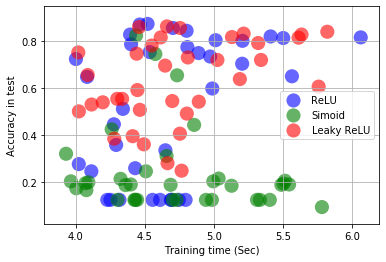

In [0]:
fig, ax = plt.subplots()
plt.xlabel('Training time (Sec)')
plt.ylabel('Accuracy in test')

ax.scatter(Time_train[0:9],Acc_test[0:9],c='blue', s=200, label="ReLU",alpha=0.6, edgecolors='none')
ax.scatter(Time_train[9:18],Acc_test[9:18],c='green', s=200, label="Simoid",alpha=0.6, edgecolors='none')
ax.scatter(Time_train[18:27],Acc_test[18:27],c='red', s=200, label="Leaky ReLU",alpha=0.6, edgecolors='none')
ax.legend()
ax.grid(True)
plt.show()

## Bar plot 

<Figure size 1152x432 with 0 Axes>

<Figure size 432x288 with 0 Axes>

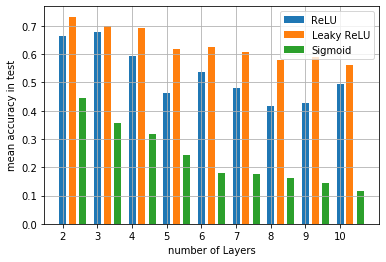

In [0]:
mean_relu=Acc_test[0:9].mean(axis=1).values
mean_sig=Acc_test[9:18].mean(axis=1).values
mean_leaky=Acc_test[18:27].mean(axis=1).values
width = 0.20  # the width of the bars
plt.figure(figsize=(16,6))
x = np.arange(len(num_Layer)) 
fig, ax = plt.subplots()
plt.xticks(np.arange(0, len(num_Layer), 1), num_Layer)
ax.bar(x +0, mean_relu, width, label='ReLU')
ax.bar(x +0.28, mean_leaky, width, label='Leaky ReLU')
ax.bar(x +0.58, mean_sig, width, label='Sigmoid')
ax.set_ylabel('mean accuracy in test')
plt.xlabel('number of Layers')
ax.legend()
plt.grid()